## Model Test

In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import CIFAR10      
from torch.utils.data import DataLoader
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.inception import inception_v3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dict_path = "C:\\Users\\jiayang\\ipynb\\trainedModel\\Inception_CIFAR10.pth"
model = inception_v3(pretrained=True, dict_path=dict_path).to(device)

# preprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),       
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  
])

# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.2).to(device)
model.set_temperature(temp_scal_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Loading weights from: C:\Users\jiayang\ipynb\trainedModel\Inception_CIFAR10.pth
Files already downloaded and verified
Before temperature - NLL: 0.361, ECE: 0.033
Optimal temperature: 5.125
After temperature - NLL: 0.891, ECE: 0.411


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5681 ± 0.0031
Final Average Prediction Set Size: 1.81 ± 0.02
Final Average Coverage: 0.8973 ± 0.0042
Final Average Real Probability: 0.8769 ± 0.0039


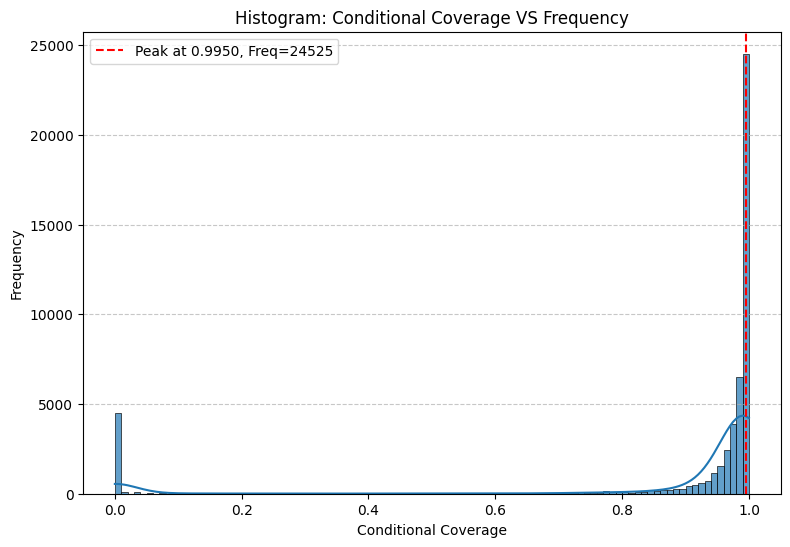

24525 (49.05%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5681 ± 0.0031
Final Average Prediction Set Size: 1.81 ± 0.02
Final Average Coverage: 0.8973 ± 0.0042
Final Average Real Probability: 0.8769 ± 0.0039


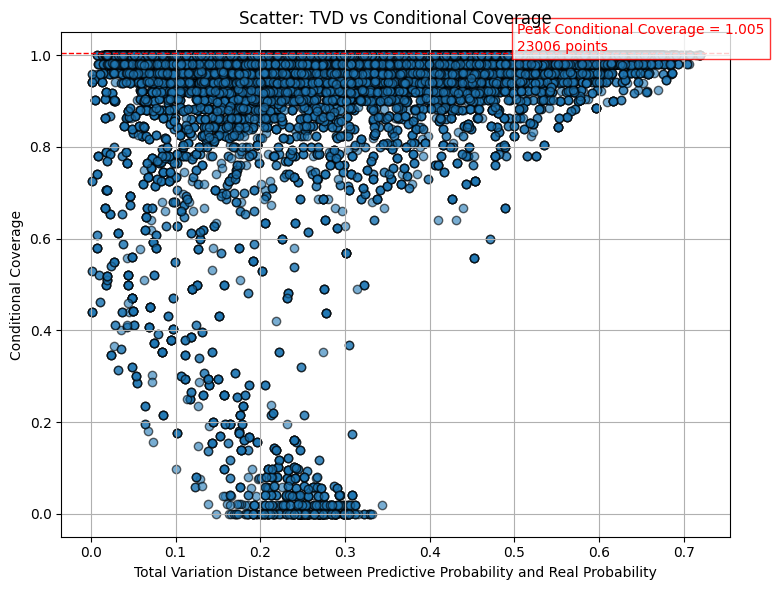

Peak Conditional Coverage = 1.005, with 23006 samples

=== Count Regions Summary ===
35008 (70.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
5357 (10.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
1865 (3.7%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.91451']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.76682']
  Real Probability Set      : ['0.84615']
Sample 3:
  Predictive Probability Set: ['0.88776']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.21204', '0.20552']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.44437', '0.14593']
  Real Probability Set      : ['0.02000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.21204', '0.20552']
  Real Probability Set      : [

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5915 ± 0.0042
Final Average Prediction Set Size: 1.50 ± 0.01
Final Average Coverage: 0.8979 ± 0.0038
Final Average Real Probability: 0.8744 ± 0.0036


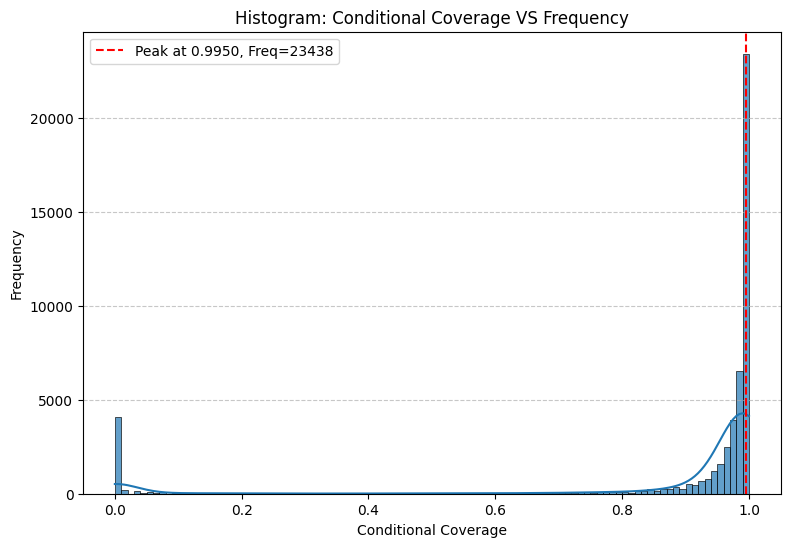

23438 (46.88%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5915 ± 0.0042
Final Average Prediction Set Size: 1.50 ± 0.01
Final Average Coverage: 0.8979 ± 0.0038
Final Average Real Probability: 0.8744 ± 0.0036


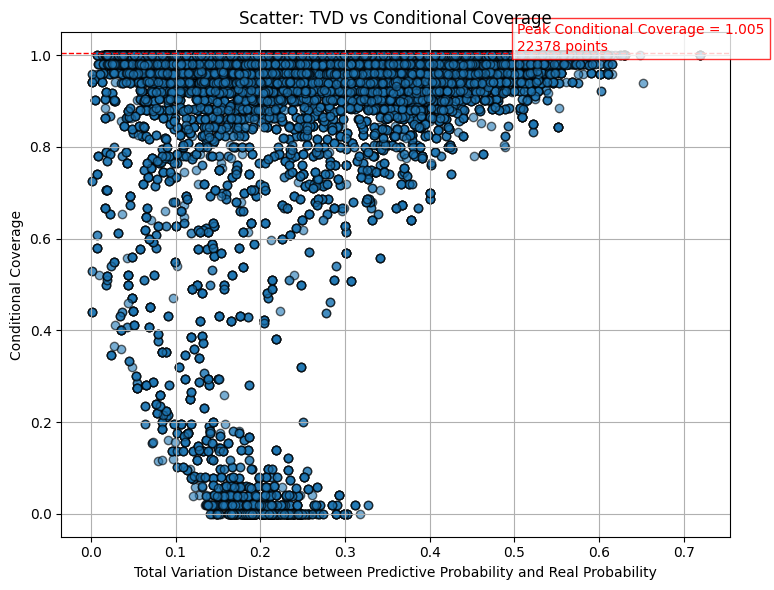

Peak Conditional Coverage = 1.005, with 22378 samples

=== Count Regions Summary ===
38916 (77.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
2016 (4.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2829 (5.7%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.82030']
  Real Probability Set      : ['0.94000']
Sample 2:
  Predictive Probability Set: ['0.76612']
  Real Probability Set      : ['0.96078']
Sample 3:
  Predictive Probability Set: ['0.88179']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.35720', '0.20964']
  Real Probability Set      : ['0.00000', '0.05357']
Sample 2:
  Predictive Probability Set: ['0.25735', '0.14602']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.22216', '0.20497']
  Real Probability Set      : ['

In [5]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6853 ± 0.0054
Final Average Prediction Set Size: 1.17 ± 0.01
Final Average Coverage: 0.8999 ± 0.0037
Final Average Real Probability: 0.8730 ± 0.0039


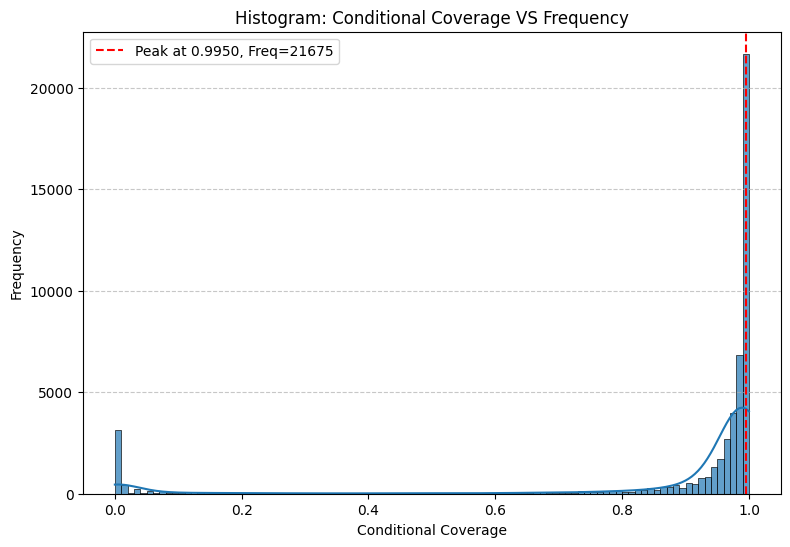

21675 (43.35%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6853 ± 0.0054
Final Average Prediction Set Size: 1.17 ± 0.01
Final Average Coverage: 0.8999 ± 0.0037
Final Average Real Probability: 0.8730 ± 0.0039


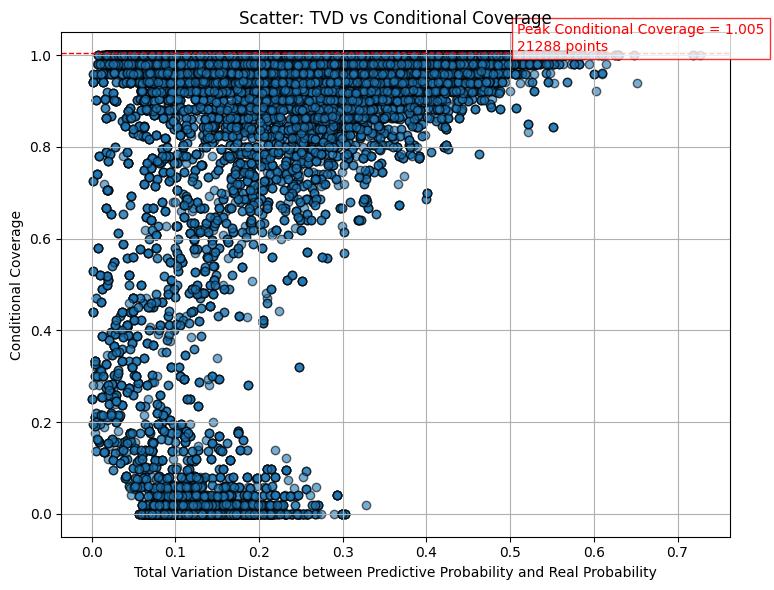

Peak Conditional Coverage = 1.005, with 21288 samples

=== Count Regions Summary ===
41887 (83.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
475 (0.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5112 (10.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.92100']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.90357']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.90077']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.30084', '0.17875']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.35022', '0.21251']
  Real Probability Set      : ['0.02000', '0.02000']
Sample 3:
  Predictive Probability Set: ['0.27668', '0.21681']
  Real Probability Set      : ['

In [7]:
saps_cifar10h_scatter(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1)